In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel('Mock_Test.xlsx')

In [3]:
df=data.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Columns: 112 entries, ID to Feedback - What should be replaced in blank space to get the output as 
Output:
     0
     1
     2

i = 0
while i < 5:
    print(i)
    i += 1
    if i == 3:
        ________
else:
    print(0)
dtypes: datetime64[ns](2), float64(44), int64(33), object(33)
memory usage: 245.1+ KB


#### The data is collected using forms so there are chances that the user might accidently or intentionally filled it more than once.

In [5]:
df.shape

(280, 112)

#### We have a total of 280 rows and 112 columns.

In [6]:
total_time_taken=df['Completion time']-df['Start time']
total_time_taken.describe()

count                          280
mean     0 days 00:35:19.289285714
std      0 days 00:28:57.173081147
min                0 days 00:00:17
25%                0 days 00:11:24
50%                0 days 00:30:06
75%         0 days 00:52:17.750000
max                0 days 02:27:05
dtype: object

#### The data looks inadequate as you can see that minimum time taken is only 17 seconds, and 25% users have submitted the questionier in less the 12 minutes;and 50% in 30, which is quite difficult as there are almost 90-100 questions in the form.

#### Here I have dropped the rows who have submitted the form in less than 30 minutes, because there are chances that they might have cheated on the test or they have resubmitted the test again after knowing the answers. 

In [7]:
df.drop(df[total_time_taken < ('0 0 days 00:30:00')].index,inplace=True)

In [8]:
df

,ID,Start time,Completion time,Email,Name,Total points,Quiz feedback,Please fill your full name?,Points - Please fill your full name?,Feedback - Please fill your full name?,...,"Feedback - What should be replace in blank space to get output as 33?\n\nnames1 = ['Amir', 'Bear', 'Charlton', 'Daman']\nnames2 = names1\nnames3 = names1\n\nnames2[0] = 'Alice'\nnames3[1] = 'Bob'\n\nsum = 0\nfor ls i...","Which should we write to get the output as NEWYORK or to access NEWYORK?\n\ndata = {1: {\n ""id"" : 390669115,\n ""name"" : ""ProgramState"",\n ""dataTypeName"" : ""text"",\n ""descript...","Points - Which should we write to get the output as NEWYORK or to access NEWYORK?\n\ndata = {1: {\n ""id"" : 390669115,\n ""name"" : ""ProgramState"",\n ""dataTypeName"" : ""text"",\n ""descript...","Feedback - Which should we write to get the output as NEWYORK or to access NEWYORK?\n\ndata = {1: {\n ""id"" : 390669115,\n ""name"" : ""ProgramState"",\n ""dataTypeName"" : ""text"",\n ""descript...","What should be replaced in line 5 blank space to get the output as 1?\n\n1. myList = [1, 5, 5, 5, 5, 1]\n2. max = myList[0]\n3. indexOfMax = 0\n4. for i in range(1, len(myList)):\n5. if myList[i] __...","Points - What should be replaced in line 5 blank space to get the output as 1?\n\n1. myList = [1, 5, 5, 5, 5, 1]\n2. max = myList[0]\n3. indexOfMax = 0\n4. for i in range(1, len(myList)):\n5. if myList[i] __...","Feedback - What should be replaced in line 5 blank space to get the output as 1?\n\n1. myList = [1, 5, 5, 5, 5, 1]\n2. max = myList[0]\n3. indexOfMax = 0\n4. for i in range(1, len(myList)):\n5. if myList[i] __...",What should be replaced in blank space to get the output as \nOutput:\n 0\n 1\n 2\n\ni = 0\nwhile i < 5:\n print(i)\n i += 1\n if i == 3:\n ________\nelse:\n print(0),Points - What should be replaced in blank space to get the output as \nOutput:\n 0\n 1\n 2\n\ni = 0\nwhile i < 5:\n print(i)\n i += 1\n if i == 3:\n ________\nelse:\n print(0),Feedback - What should be replaced in blank space to get the output as \nOutput:\n 0\n 1\n 2\n\ni = 0\nwhile i < 5:\n print(i)\n i += 1\n if i == 3:\n ________\nelse:\n print(0)
42,43,2021-07-03 14:15:32,2021-07-03 14:45:50,anonymous,NaN,20,NaN,Amit patel,NaN,NaN,...,NaN,14..,0,NaN,bsbsns,0,NaN,bzhsn,0,NaN
43,44,2021-07-03 14:16:00,2021-07-03 14:46:02,anonymous,NaN,16,NaN,Kunal sahu,NaN,NaN,...,NaN,6,0,NaN,K,0,NaN,7,0,NaN
45,46,2021-07-03 14:14:47,2021-07-03 14:46:26,anonymous,NaN,17,NaN,Prashant mewade,NaN,NaN,...,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN
46,47,2021-07-03 14:14:01,2021-07-03 14:46:47,anonymous,NaN,23,NaN,YOGESH KUMAWAT,NaN,NaN,...,NaN,YORK,0,NaN,indexof,0,NaN,print(i),0,NaN
49,50,2021-07-03 14:13:58,2021-07-03 14:47:57,anonymous,NaN,16,NaN,HITANSHU SONI,NaN,NaN,...,NaN,"""NEW YORK""",0,NaN,4,0,NaN,5,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,267,2021-07-03 15:17:21,2021-07-03 16:59:58,anonymous,NaN,36,NaN,Pranjal Gangwal,NaN,NaN,...,NaN,NEWYORK,0,NaN,5,0,NaN,break,3,NaN
273,274,2021-07-03 16:38:13,2021-07-03 17:14:00,anonymous,NaN,37,NaN,Chandni Singh,NaN,NaN,...,NaN,NaN,0,NaN,>,4,NaN,break,3,NaN
276,277,2021-07-03 16:20:43,2021-07-03 17:17:03,anonymous,NaN,32,NaN,Ruchita Rani,NaN,NaN,...,NaN,"data.get(""item"")",0,NaN,>,4,NaN,i=5,0,NaN
277,278,2021-07-03 16:49:17,2021-07-03 17:19:23,anonymous,NaN,45,NaN,Utkarsh Goswami,NaN,NaN,...,NaN,NaN,0,NaN,>,4,NaN,Break,3,NaN


#### As we are looking only for the toppers, we dont want to process the data of the students who have not scored well. On removing the students I found that most of the users that have resubmitted the form is decreased to almost 95% and we are left with only 142 students.

#### Here I checked for duplicates in name and found that we are still left with a duplicate values. But these values might be NaN so I also checked the mail of the students with unique values and found that the remaining are not NaN values and are actual users who have submitted the data with diiferent name alignments.

In [9]:
d=df['Please fill your full name?'].str.lower()

In [10]:
d.drop_duplicates(inplace=True)

In [11]:
d

42          amit patel
43          kunal sahu
45     prashant mewade
46      yogesh kumawat
49       hitanshu soni
            ...       
266    pranjal gangwal
273      chandni singh
276       ruchita rani
277    utkarsh goswami
279         salma bano
Name: Please fill your full name?, Length: 141, dtype: object

In [19]:
m=df['Please fill your email?'].str.lower()
m

42          amitpatel52206@gmail.com
43              kunal3sahu@gmail.com
45      prashantmewade 576@gmail.com
46         yogesh15kumawat@gmail.com
49          hitanshusoni18@gmail.com
                   ...              
266      pranjalgangwal07@gmail.com 
273       singhchandni2003@gmail.com
276          ruchitarani14@gmail.com
277    voraciousutkarsh536@gmail.com
279          salmabano0108@gmail.com
Name: Please fill your email?, Length: 141, dtype: object

In [13]:
df=df.loc[d.index]
df

,ID,Start time,Completion time,Email,Name,Total points,Quiz feedback,Please fill your full name?,Points - Please fill your full name?,Feedback - Please fill your full name?,...,"Feedback - What should be replace in blank space to get output as 33?\n\nnames1 = ['Amir', 'Bear', 'Charlton', 'Daman']\nnames2 = names1\nnames3 = names1\n\nnames2[0] = 'Alice'\nnames3[1] = 'Bob'\n\nsum = 0\nfor ls i...","Which should we write to get the output as NEWYORK or to access NEWYORK?\n\ndata = {1: {\n ""id"" : 390669115,\n ""name"" : ""ProgramState"",\n ""dataTypeName"" : ""text"",\n ""descript...","Points - Which should we write to get the output as NEWYORK or to access NEWYORK?\n\ndata = {1: {\n ""id"" : 390669115,\n ""name"" : ""ProgramState"",\n ""dataTypeName"" : ""text"",\n ""descript...","Feedback - Which should we write to get the output as NEWYORK or to access NEWYORK?\n\ndata = {1: {\n ""id"" : 390669115,\n ""name"" : ""ProgramState"",\n ""dataTypeName"" : ""text"",\n ""descript...","What should be replaced in line 5 blank space to get the output as 1?\n\n1. myList = [1, 5, 5, 5, 5, 1]\n2. max = myList[0]\n3. indexOfMax = 0\n4. for i in range(1, len(myList)):\n5. if myList[i] __...","Points - What should be replaced in line 5 blank space to get the output as 1?\n\n1. myList = [1, 5, 5, 5, 5, 1]\n2. max = myList[0]\n3. indexOfMax = 0\n4. for i in range(1, len(myList)):\n5. if myList[i] __...","Feedback - What should be replaced in line 5 blank space to get the output as 1?\n\n1. myList = [1, 5, 5, 5, 5, 1]\n2. max = myList[0]\n3. indexOfMax = 0\n4. for i in range(1, len(myList)):\n5. if myList[i] __...",What should be replaced in blank space to get the output as \nOutput:\n 0\n 1\n 2\n\ni = 0\nwhile i < 5:\n print(i)\n i += 1\n if i == 3:\n ________\nelse:\n print(0),Points - What should be replaced in blank space to get the output as \nOutput:\n 0\n 1\n 2\n\ni = 0\nwhile i < 5:\n print(i)\n i += 1\n if i == 3:\n ________\nelse:\n print(0),Feedback - What should be replaced in blank space to get the output as \nOutput:\n 0\n 1\n 2\n\ni = 0\nwhile i < 5:\n print(i)\n i += 1\n if i == 3:\n ________\nelse:\n print(0)
42,43,2021-07-03 14:15:32,2021-07-03 14:45:50,anonymous,NaN,20,NaN,Amit patel,NaN,NaN,...,NaN,14..,0,NaN,bsbsns,0,NaN,bzhsn,0,NaN
43,44,2021-07-03 14:16:00,2021-07-03 14:46:02,anonymous,NaN,16,NaN,Kunal sahu,NaN,NaN,...,NaN,6,0,NaN,K,0,NaN,7,0,NaN
45,46,2021-07-03 14:14:47,2021-07-03 14:46:26,anonymous,NaN,17,NaN,Prashant mewade,NaN,NaN,...,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN
46,47,2021-07-03 14:14:01,2021-07-03 14:46:47,anonymous,NaN,23,NaN,YOGESH KUMAWAT,NaN,NaN,...,NaN,YORK,0,NaN,indexof,0,NaN,print(i),0,NaN
49,50,2021-07-03 14:13:58,2021-07-03 14:47:57,anonymous,NaN,16,NaN,HITANSHU SONI,NaN,NaN,...,NaN,"""NEW YORK""",0,NaN,4,0,NaN,5,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,267,2021-07-03 15:17:21,2021-07-03 16:59:58,anonymous,NaN,36,NaN,Pranjal Gangwal,NaN,NaN,...,NaN,NEWYORK,0,NaN,5,0,NaN,break,3,NaN
273,274,2021-07-03 16:38:13,2021-07-03 17:14:00,anonymous,NaN,37,NaN,Chandni Singh,NaN,NaN,...,NaN,NaN,0,NaN,>,4,NaN,break,3,NaN
276,277,2021-07-03 16:20:43,2021-07-03 17:17:03,anonymous,NaN,32,NaN,Ruchita Rani,NaN,NaN,...,NaN,"data.get(""item"")",0,NaN,>,4,NaN,i=5,0,NaN
277,278,2021-07-03 16:49:17,2021-07-03 17:19:23,anonymous,NaN,45,NaN,Utkarsh Goswami,NaN,NaN,...,NaN,NaN,0,NaN,>,4,NaN,Break,3,NaN


#### After cleaning the data we are finally left with 141 unique values. Also I have checked the students who have given correct answer for the question left unchecked.

In [14]:
ind=df[df[' What should be replace in blank space to get output as 33?\n\nnames1 = [\'Amir\', \'Bear\', \'Charlton\', \'Daman\']\nnames2 = names1\nnames3 = names1\n\nnames2[0] = \'Alice\'\nnames3[1] = \'Bob\'\n\nsum = 0\nfor ls i...'] == 'if if'].index

In [15]:
ind

Int64Index([ 43,  49,  60,  78,  89,  91,  93,  95, 100, 105, 107, 108, 111,
            116, 117, 122, 124, 134, 136, 140, 143, 145, 147, 152, 155, 160,
            166, 167, 169, 170, 171, 176, 189, 191, 192, 196, 197, 198, 203,
            207, 210, 213, 215, 219, 221, 226, 231, 246, 254, 255, 258, 265,
            266, 273, 277],
           dtype='int64')

#### Then I addend 3 points to the students who have given correct answers and sorted the scores and find the top scorers

In [16]:
df['Total points']=df.loc[ind]['Total points']+3
sort=df['Total points'].sort_values(ascending=False)
final=sort.head()
final

255    60.0
219    60.0
170    60.0
89     58.0
231    56.0
Name: Total points, dtype: float64

#### Top 5 scorers

In [17]:
toppers=df.loc[final.index]['Please fill your full name?']
toppers

255             Ujjwal Singh
219            Himanshu Soni
170    Dhiraj kumar kushwaha
89              Kartik Verma
231      Blesson Jacob Sunil
Name: Please fill your full name?, dtype: object

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


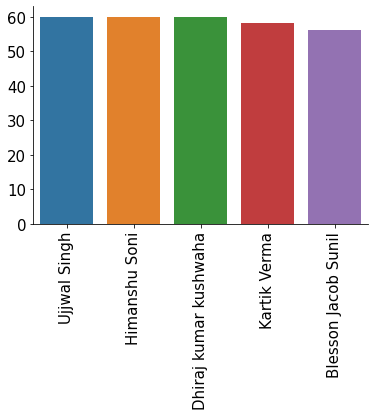

In [18]:
sns.barplot(toppers.values,final.values)
sns.despine(top=True)
plt.xticks(rotation=90,size=15)
plt.yticks(size=15)
plt.show()